In [15]:
import pandas as pd
import numpy as np
import plotly.colors
import plotly.graph_objects as go

In [16]:
# Reading attendance data
df_frequentation = pd.read_csv('data/frequentation-gares.csv', sep=';')
df_frequentation.head()

,Nom de la gare,Code UIC complet,Code postal,Segmentation DRG 2018,Total Voyageurs 2018,Total Voyageurs + Non voyageurs 2018,Total Voyageurs 2017,Total Voyageurs + Non voyageurs 2017,Total Voyageurs 2016,Total Voyageurs + Non voyageurs 2016,Total Voyageurs 2015,Total Voyageurs + Non voyageurs 2015
0,Abancourt,87313759,60220,c,40228,40228,43760,43760,41096,41096.551614,39720,39720
1,Agay,87757559,83530,c,15093,15093,14154,14154,19240,19240.514370,19121,19121
2,Agde,87781278,34300,a,588297,735372,697091,871364,660656,825820.929253,662516,828146
3,Agonac,87595157,24460,c,1492,1492,1583,1583,1134,1134.699996,1127,1127
4,Aigrefeuille Le Thou,87485193,17290,c,18670,18670,14513,14513,266,266.157144,0,0


In [17]:
# Reading train station data
df_gares = pd.read_csv('data/referentiel-gares-voyageurs.csv', sep=';')
df_gares.head()

,Code plate-forme,Intitulé gare,Intitulé fronton de gare,Gare DRG,Gare étrangère,Agence gare,Région SNCF,Unité gare,UT,Nbre plateformes,...,Longitude WGS84,Latitude WGS84,Code UIC,TVS,Segment DRG,Niveau de service,SOP,RG,Date fin validité plateforme,WGS 84
0,00007-1,Bourg-Madame,Bourg-Madame,True,False,Agence Grand Sud,REGION LANGUEDOC-ROUSSILLON,UG Languedoc Roussillon,BOURG MADAME GARE,1,...,1.948670,42.432407,87784876,BMD,c,1.0,NaN,GARES C LANGUEDOC ROUSSILLON,NaN,"42.4324069,1.9486704"
1,00014-1,Bolquère - Eyne,Bolquère - Eyne,True,False,Agence Grand Sud,REGION LANGUEDOC-ROUSSILLON,UG Languedoc Roussillon,BOLQUERE EYNE GARE,1,...,2.087559,42.497873,87784801,BQE,c,1.0,NaN,GARES C LANGUEDOC ROUSSILLON,NaN,"42.4978734,2.0875591"
2,00015-1,Mont-Louis - La Cabanasse,Mont-Louis - La Cabanasse,True,False,Agence Grand Sud,REGION LANGUEDOC-ROUSSILLON,UG Languedoc Roussillon,MONT LOUIS LA CABANASSE GARE,1,...,2.113138,42.502090,87784793,MTC,c,1.0,NaN,GARES C LANGUEDOC ROUSSILLON,NaN,"42.5020902,2.1131379"
3,00020-1,Thuès les Bains,Thuès les Bains,True,False,Agence Grand Sud,REGION LANGUEDOC-ROUSSILLON,UG Languedoc Roussillon,THUES LES BAINS GARE,1,...,2.249094,42.528801,87784744,THB,c,1.0,NaN,GARES C LANGUEDOC ROUSSILLON,NaN,"42.5288009,2.249094"
4,00027-1,Prades - Molitg-les-Bains,Prades - Molitg-les-Bains,True,False,Agence Grand Sud,REGION LANGUEDOC-ROUSSILLON,UG Languedoc Roussillon,PRADES MOLITG LES BAINS GARE,1,...,2.429418,42.617099,87784637,PDS,c,1.0,NaN,GARES C LANGUEDOC ROUSSILLON,NaN,"42.6170988,2.4294184"


In [18]:
df = df_gares.merge(
    right=df_frequentation, 
    left_on='Code UIC', 
    right_on='Code UIC complet', 
    how='inner')

# Filtering, adding sqrt and category
df = df[df['Total Voyageurs 2018'] > 1000]
#df['Total Voyageurs 2018 sqrt'] = np.sqrt(df['Total Voyageurs 2018'])
df['category'] = pd.cut(df['Total Voyageurs 2018'], bins=[1e4,1e5, 1e6, 1e7, np.inf])

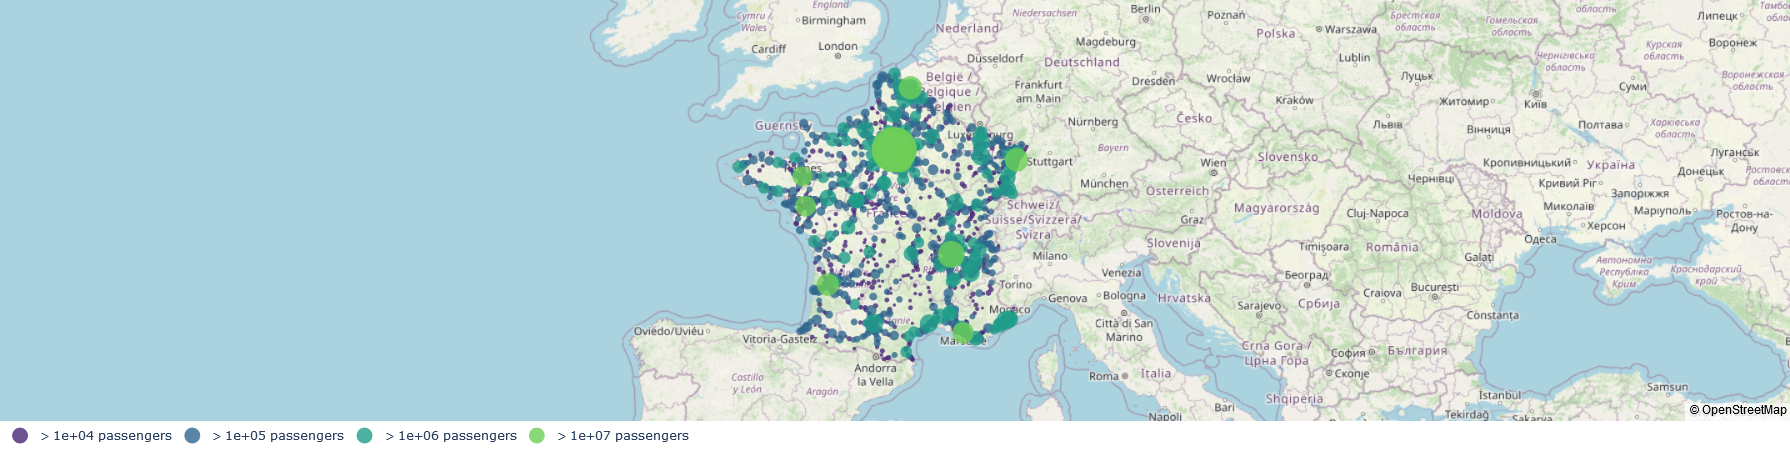

In [54]:
# Visualization

fig = go.Figure()
colors = plotly.colors.sequential.Viridis

for i, cat in enumerate(df.category.cat.categories):
    df_sub = df[df.category == cat]
    fig.add_trace(go.Scattermapbox(
        lat=df_sub['Latitude WGS84'], 
        lon=df_sub['Longitude WGS84'],
        text=df_sub['Intitulé gare'],
        marker=dict(
            #color=df_sub['Total Voyageurs 2018 sqrt'],
            color=colors[2*i+1],
            size=np.sqrt(df_sub['Total Voyageurs 2018']),
            sizemin=1,
            sizeref=15,
            sizemode='area',
            opacity=.8,
        ),
        meta=df_sub['Total Voyageurs 2018'],
        hovertemplate="%{text}" + "<br>" + "Passengers: %{meta}",
        name=f'> {cat.left:1.0e} passengers',          
))

fig.update_layout(
    mapbox_style="open-street-map",
    #title='Passengers per french train station in 2018',
    margin={'l': 0, 'r': 0, 't': 0, 'b': 0},
    mapbox=dict(
        center={'lon': 2.39, 'lat': 47.09},
        zoom=4
    ),
)

fig.update_layout(legend={'orientation': 'h', 'y': 0})

fig.show(config={'scrollZoom': True})

In [55]:
fig.write_html('sncf-train-stations.html')